## Check outputs .root and plot

#### Import uproot and investiage .root file

In [1]:
import uproot

hist_path = "hist.root"   # adjust if your notebook isn't in runs/it_pileup
f = uproot.open(hist_path)

keys = [k.split(";")[0] for k in f.keys()]          # strip ROOT cycle suffix ";1"
keys = sorted(set(keys))

print(f"Found {len(keys)} unique objects in {hist_path}\n")
for k in keys:
    print(k)


Found 1579 unique objects in hist.root

EcalClusterAnalyzer
EcalClusterAnalyzer/ancestors
EcalClusterAnalyzer/cluster_RMSX
EcalClusterAnalyzer/cluster_RMSY
EcalClusterAnalyzer/cluster_distance
EcalClusterAnalyzer/correctly_predicted_events
EcalClusterAnalyzer/dE_cl2_vs_cl1
EcalClusterAnalyzer/energy_percentage
EcalClusterAnalyzer/mixed_hit_energy
EcalClusterAnalyzer/number_of_clusters
EcalClusterAnalyzer/number_of_clusters_first_layer
EcalClusterAnalyzer/number_of_clusters_per_layer
EcalClusterAnalyzer/same_ancestor
EcalClusterAnalyzer/sp_clue_distance
EcalClusterAnalyzer/sp_clue_distance_vs_layer
EcalClusterAnalyzer/sp_clue_x_residual
EcalClusterAnalyzer/sp_clue_y_residual
EcalClusterAnalyzer/sp_distance
EcalClusterAnalyzer/sp_ele_distance_vs_purity
EcalClusterAnalyzer/tag0frac_vs_SPdist
EcalClusterAnalyzer/total_energy_vs_hits
EcalClusterAnalyzer/total_energy_vs_purity
EcalClusterAnalyzer/total_rechits_in_event
EcalClusterAnalyzer/unclustered_hits
EcalClusterAnalyzer/unclustered_hits

#### Group the output in categories

In [2]:
from collections import defaultdict

def group_name(k: str) -> str:
    s = k.lower()

    # Trigger scintillator DQM
    if "trigscint" in s or "trig_scint" in s or "triggerpad" in s:
        return "TrigScint DQM (TrigScintSim/Digi/Cluster/Track)"

    # ECAL DQM / features
    if "ecaldigi" in s or "digiverify" in s:
        return "EcalDigiVerify (dqm.EcalDigiVerify)"
    if "ecalshower" in s:
        return "EcalShowerFeatures (dqm.EcalShowerFeatures)"
    if "mip" in s and "ecal" in s:
        return "EcalMipTrackingFeatures (dqm.EcalMipTrackingFeatures)"
    if "ecalveto" in s or "vetores" in s:
        return "EcalVetoResults / ECAL veto DQM (dqm.EcalVetoResults)"

    # HCAL DQM
    if "hcal" in s:
        return "HCal DQM / inefficiency"

    # Trigger / PN DQM
    if "trigger" in s and "trigscint" not in s:
        return "Trigger DQM (dqm.Trigger)"
    if "photonuclear" in s or (("pn" in s) and ("ecal" in s or "photo" in s)):
        return "PhotoNuclear DQM (dqm.PhotoNuclearDQM)"

    # CLUE / clustering
    if "cluster" in s and "ecal" in s:
        return "EcalClusterAnalyzer / CLUE"

    # PF / pileup finder (expected incomplete due to your PFTrack fatal)
    if "pf" in s or "pileup" in s:
        return "PFlow / PileupFinder (may be incomplete)"

    return "Other / uncategorized"


groups = defaultdict(list)
for k in keys:
    groups[group_name(k)].append(k)

for g in sorted(groups.keys()):
    print("\n" + "="*90)
    print(g)
    print("="*90)
    for k in groups[g]:
        print(k)



EcalClusterAnalyzer / CLUE
EcalClusterAnalyzer
EcalClusterAnalyzer/ancestors
EcalClusterAnalyzer/cluster_RMSX
EcalClusterAnalyzer/cluster_RMSY
EcalClusterAnalyzer/cluster_distance
EcalClusterAnalyzer/correctly_predicted_events
EcalClusterAnalyzer/dE_cl2_vs_cl1
EcalClusterAnalyzer/energy_percentage
EcalClusterAnalyzer/mixed_hit_energy
EcalClusterAnalyzer/number_of_clusters
EcalClusterAnalyzer/number_of_clusters_first_layer
EcalClusterAnalyzer/number_of_clusters_per_layer
EcalClusterAnalyzer/same_ancestor
EcalClusterAnalyzer/sp_clue_distance
EcalClusterAnalyzer/sp_clue_distance_vs_layer
EcalClusterAnalyzer/sp_clue_x_residual
EcalClusterAnalyzer/sp_clue_y_residual
EcalClusterAnalyzer/sp_distance
EcalClusterAnalyzer/sp_ele_distance_vs_purity
EcalClusterAnalyzer/tag0frac_vs_SPdist
EcalClusterAnalyzer/total_energy_vs_hits
EcalClusterAnalyzer/total_energy_vs_purity
EcalClusterAnalyzer/total_rechits_in_event
EcalClusterAnalyzer/unclustered_hits
EcalClusterAnalyzer/unclustered_hits_percentage


#### Find nice names for categories 

In [3]:
import re
from pathlib import Path

cfg_path = Path("config.py")   # adjust if needed
cfg = cfg_path.read_text()

# DQM analyzers explicitly written as dqm.Something(...)
dqm_mods = sorted(set(re.findall(r'dqm\.(\w+)\s*\(', cfg)))

# Other instantiated modules (rough; includes non-LDMX names too)
instantiated = sorted(set(re.findall(r'=\s*([A-Za-z_][A-Za-z0-9_]*)\s*\(', cfg)))

print("DQM modules referenced in config.py:")
for m in dqm_mods:
    print("  - dqm." + m)

print("\nOther modules instantiated in config.py (rough list):")
for m in instantiated:
    if m in {"Process"}:
        continue
    print("  - " + m)


DQM modules referenced in config.py:
  - dqm.EcalClusterAnalyzer
  - dqm.EcalDigiVerify
  - dqm.EcalMipTrackingFeatures
  - dqm.EcalShowerFeatures
  - dqm.EcalVetoResults
  - dqm.HCalDQM
  - dqm.HcalInefficiencyAnalyzer
  - dqm.PhotoNuclearDQM
  - dqm.TrigScintClusterDQM
  - dqm.TrigScintDigiDQM
  - dqm.TrigScintSimDQM
  - dqm.TrigScintTrackDQM
  - dqm.Trigger

Other modules instantiated in config.py (rough list):
  - ElectronCounter
  - OverlayProducer
  - int


#### Create CSV with pandas

In [ ]:
import pandas as pd

rows = []
for g in sorted(groups.keys()):
    for k in groups[g]:
        rows.append({"group (likely analyzer)": g, "histogram": k})

df = pd.DataFrame(rows)

# save to CSV
df.to_csv("histogram_index.csv", index=False)

# display grouped view
df


,group (likely analyzer),histogram
0,EcalClusterAnalyzer / CLUE,EcalClusterAnalyzer
1,EcalClusterAnalyzer / CLUE,EcalClusterAnalyzer/ancestors
2,EcalClusterAnalyzer / CLUE,EcalClusterAnalyzer/cluster_RMSX
3,EcalClusterAnalyzer / CLUE,EcalClusterAnalyzer/cluster_RMSY
4,EcalClusterAnalyzer / CLUE,EcalClusterAnalyzer/cluster_distance
...,...,...
1574,Trigger DQM (dqm.Trigger),Trigger/Trigger.EcalEcut
1575,Trigger DQM (dqm.Trigger),Trigger/Trigger.EcalEsum
1576,Trigger DQM (dqm.Trigger),Trigger/Trigger.EcalLayercut
1577,Trigger DQM (dqm.Trigger),Trigger/Trigger.nElectrons


#### Helper functions for plotting work

In [8]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

f = uproot.open("hist.root")

def exists(name):
    return any(k.split(";")[0] == name for k in f.keys())

def obj(name):
    # uproot keys include ;1 etc, so find exact match
    for k in f.keys():
        if k.split(";")[0] == name:
            return f[k]
    raise KeyError(name)

def plot_hist(name, save=None):
    h = obj(name)

    # uproot hist objects usually support to_numpy()
    arr = h.to_numpy()

    plt.figure()
    if len(arr) == 2:
        # 1D: (values, edges)
        values, edges = arr
        plt.step(edges[:-1], values, where="post")
        plt.xlabel("bin")
        plt.ylabel("counts")
    elif len(arr) == 3:
        # 2D: (values, xedges, yedges)
        values, xedges, yedges = arr
        plt.imshow(values.T, origin="lower", aspect="auto",
                   extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
        plt.colorbar(label="counts")
        plt.xlabel("x")
        plt.ylabel("y")
    else:
        raise RuntimeError(f"Unexpected to_numpy() shape for {name}: {len(arr)} parts")

    plt.title(name)
    plt.tight_layout()
    if save:
        plt.savefig(save, dpi=150)
    plt.show()


#### Plotting

Missing: []


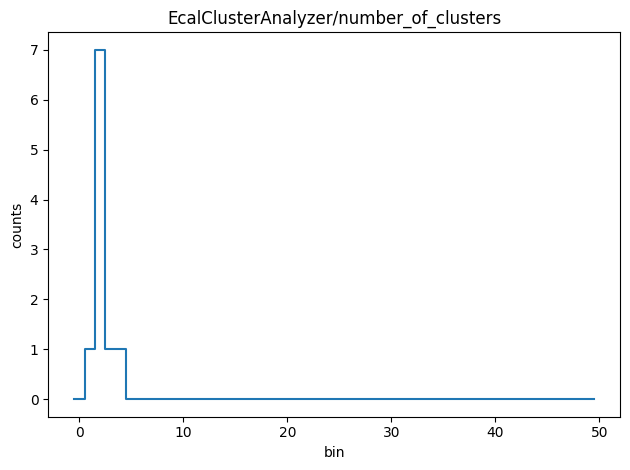

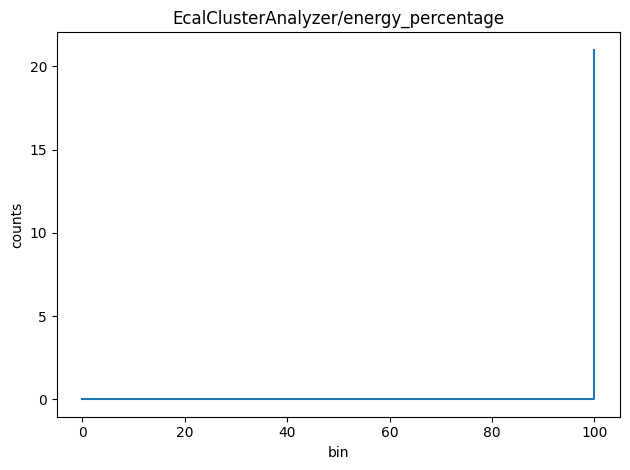

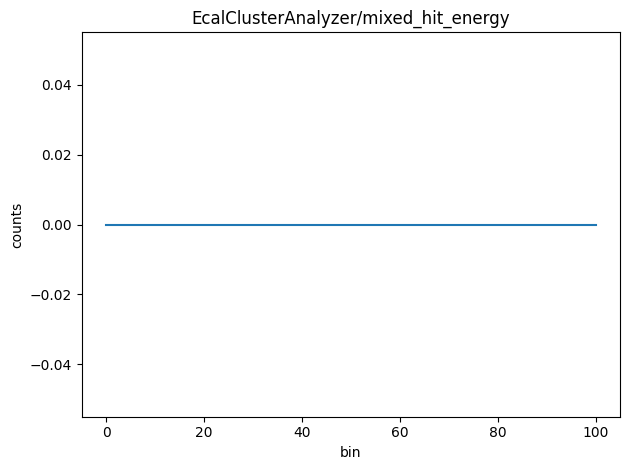

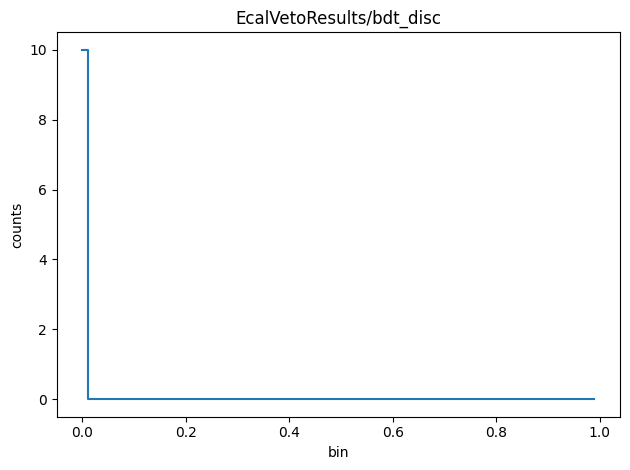

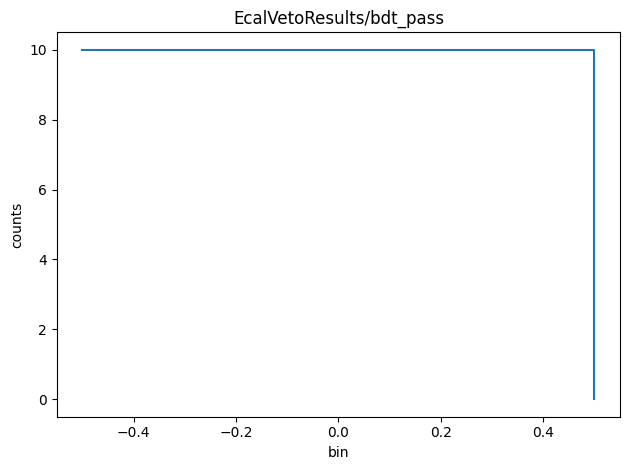

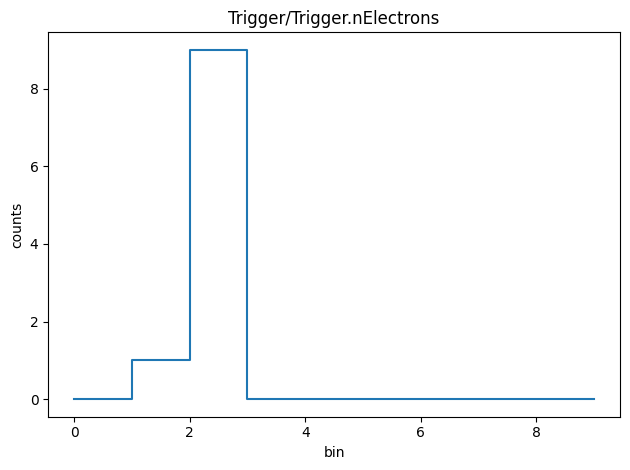

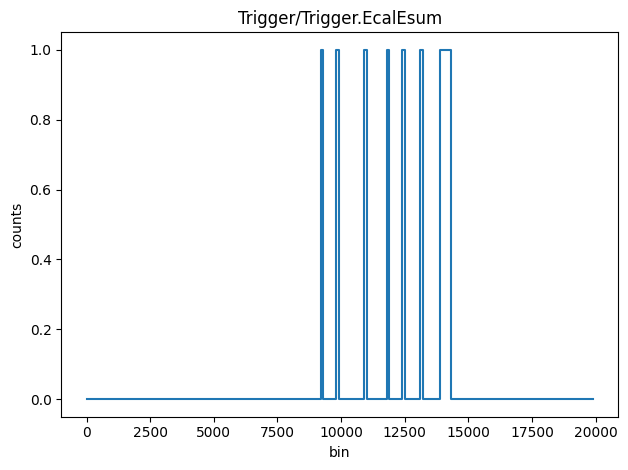

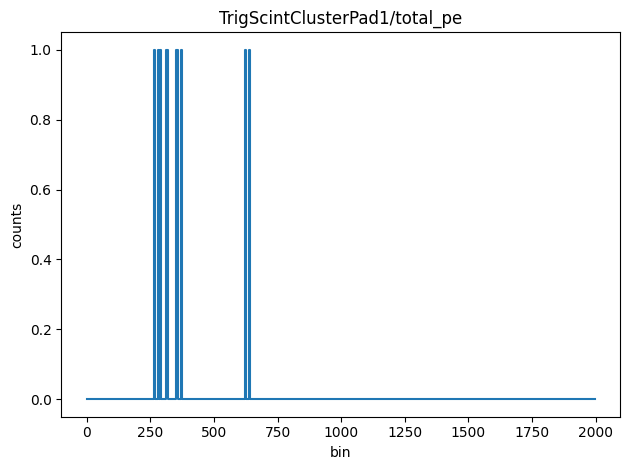

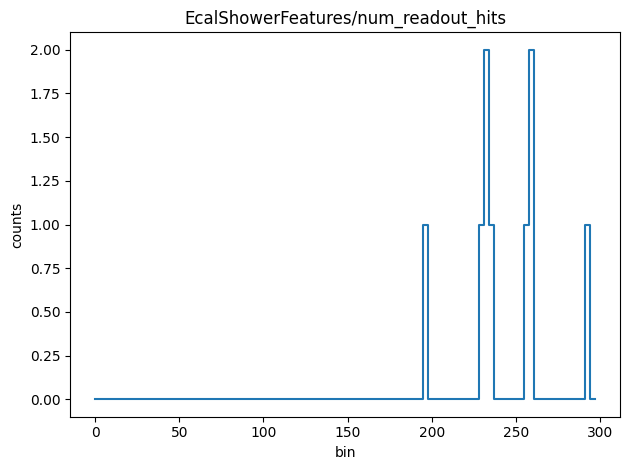

In [9]:
to_plot = [
    "EcalClusterAnalyzer/number_of_clusters",
    "EcalClusterAnalyzer/energy_percentage",
    "EcalClusterAnalyzer/mixed_hit_energy",
    "EcalVetoResults/bdt_disc",
    "EcalVetoResults/bdt_pass",
    "Trigger/Trigger.nElectrons",
    "Trigger/Trigger.EcalEsum",
    "TrigScintClusterPad1/total_pe",
    "EcalShowerFeatures/num_readout_hits",
]

missing = [h for h in to_plot if not exists(h)]
print("Missing:", missing)

for h in to_plot:
    if exists(h):
        plot_hist(h)


In [10]:
keys = sorted(set(k.split(";")[0] for k in f.keys()))
[p for p in keys if p.startswith("EcalVetoResults/")]
[p for p in keys if p.startswith("Trigger/")]
[p for p in keys if p.startswith("TrigScintClusterPad1/")]
[p for p in keys if p.startswith("EcalClusterAnalyzer/")]


['EcalClusterAnalyzer/ancestors',
 'EcalClusterAnalyzer/cluster_RMSX',
 'EcalClusterAnalyzer/cluster_RMSY',
 'EcalClusterAnalyzer/cluster_distance',
 'EcalClusterAnalyzer/correctly_predicted_events',
 'EcalClusterAnalyzer/dE_cl2_vs_cl1',
 'EcalClusterAnalyzer/energy_percentage',
 'EcalClusterAnalyzer/mixed_hit_energy',
 'EcalClusterAnalyzer/number_of_clusters',
 'EcalClusterAnalyzer/number_of_clusters_first_layer',
 'EcalClusterAnalyzer/number_of_clusters_per_layer',
 'EcalClusterAnalyzer/same_ancestor',
 'EcalClusterAnalyzer/sp_clue_distance',
 'EcalClusterAnalyzer/sp_clue_distance_vs_layer',
 'EcalClusterAnalyzer/sp_clue_x_residual',
 'EcalClusterAnalyzer/sp_clue_y_residual',
 'EcalClusterAnalyzer/sp_distance',
 'EcalClusterAnalyzer/sp_ele_distance_vs_purity',
 'EcalClusterAnalyzer/tag0frac_vs_SPdist',
 'EcalClusterAnalyzer/total_energy_vs_hits',
 'EcalClusterAnalyzer/total_energy_vs_purity',
 'EcalClusterAnalyzer/total_rechits_in_event',
 'EcalClusterAnalyzer/unclustered_hits',
 'Ec